In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = 'Resources/public_transportation.csv'
raw_df = pd.read_csv(file)
next_raw_df = raw_df.sort_values(by=['Overall'])
next_raw_df

,Overall,City,Total Score,Accessibility,Safety,Resources
93,1,"Seattle, WA",77.97,7,6,3
98,2,"Boston, MA",77.84,2,34,10
99,3,"San Francisco, CA",75.21,1,27,80
97,4,"Washington, DC",71.23,3,48,52
54,5,"Madison, WI",71.06,46,1,4
...,...,...,...,...,...,...
72,96,"New Orleans, LA",42.43,28,92,100
47,97,"Charlotte, NC",40.67,53,95,88
33,98,"Tampa, FL",24.69,67,98,91
27,99,"St. Petersburg, FL",24.03,73,98,91


In [4]:
#Grab largest cities and their scores.

new = next_raw_df['City'].str.split(", ", n=1, expand = True)
next_raw_df['State'] = new[1]
next_raw_df['City'] = new[0]

transportation_df = next_raw_df[['City','State', 'Total Score']]

transportation_df


,City,State,Total Score
93,Seattle,WA,77.97
98,Boston,MA,77.84
99,San Francisco,CA,75.21
97,Washington,DC,71.23
54,Madison,WI,71.06
...,...,...,...
72,New Orleans,LA,42.43
47,Charlotte,NC,40.67
33,Tampa,FL,24.69
27,St. Petersburg,FL,24.03


In [50]:
transportation_final = transportation_df.groupby(['State']).agg({'Total Score':['mean']})

transportation_final 



,Total Score
,mean
State,
AK,54.880000
AL,56.150000
AZ,51.781429
CA,59.483529
CO,59.413333
DC,71.230000
FL,44.015000
GA,56.470000


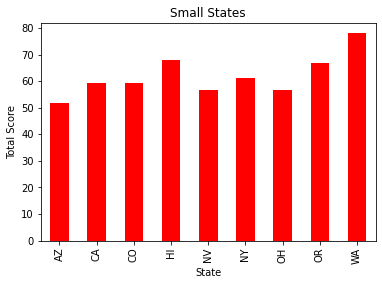

In [27]:
transit_small_states = transportation_final.loc[['AZ','CA','CO','HI','NV','NY','OH','OR','WA' ]]
transit_small_states.plot(kind='bar', color = 'red', title = 'Smaller States', ylabel = 'Total Score', legend = '' )


plt.show()

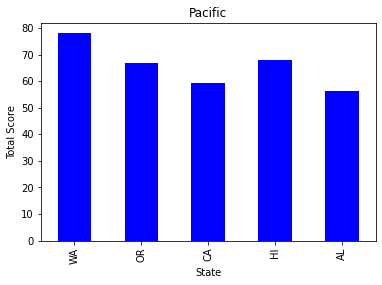

In [43]:
transit_pacific = transportation_final.loc[['WA','OR','CA','HI','AL']]

transit_pacific.plot(kind='bar',color = 'blue',title = 'Pacific',ylabel = 'Total Score',legend = '')

plt.show()

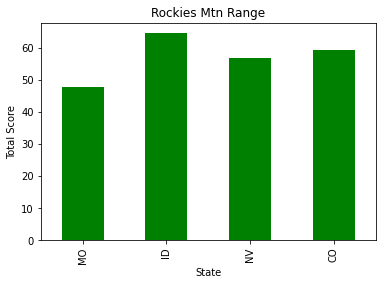

In [45]:
transit_rockies= transportation_final.loc[['MO','ID','NV','CO']]
#Utah & Wyoming data n/a
transit_rockies.plot(kind='bar',color = 'green', title= 'Rockies Mtn Range', ylabel = 'Total Score',legend = '')

plt.show()

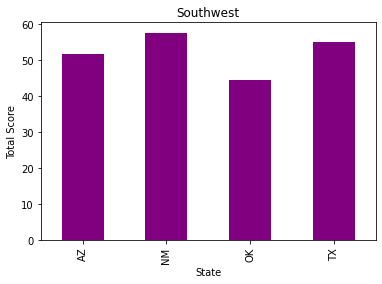

In [48]:
transit_southwest= transportation_final.loc[['AZ','NM','OK','TX']]
transit_southwest.plot(kind='bar',color = 'purple', title= 'Southwest', ylabel = 'Total Score',legend = '')

plt.show()

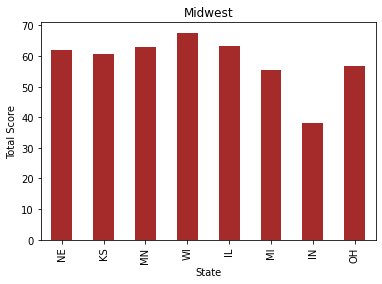

In [55]:
transit_midwest= transportation_final.loc[['NE','KS','MN','WI','IL','MI','IN','OH']]
#North Dakota, South Dakota, Missouri, & Iowa data n/a  
transit_midwest.plot(kind='bar',color = 'brown', title= 'Midwest', ylabel = 'Total Score',legend = '')

plt.show()

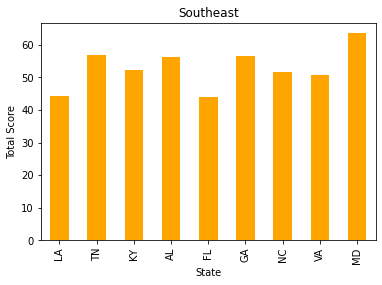

In [60]:
transit_southeast= transportation_final.loc[['LA','TN','KY','AL','FL','GA','NC','VA','MD']]
#Arkansas, Mississippi, South Carolina, West Virginia, & Deleware data n/a
transit_southeast.plot(kind='bar',color = 'orange', title= 'Southeast', ylabel = 'Total Score',legend = '')

plt.show()

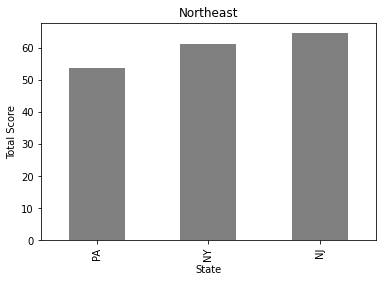

In [65]:
transit_northeast= transportation_final.loc[['PA','NY','NJ',]]
#Maine, Vermont, New Hampshire, Rhode Island, & Connecticut data n/a
transit_northeast.plot(kind='bar',color = 'gray', title= 'Northeast', ylabel = 'Total Score',legend = '')

plt.show()

In [ ]:
transportation_final.to_csv('public_transportation.csv')
